In [1]:
import numpy as np
import pandas as pd

from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [21]:
cleaned_orders=spark.read.csv(r'/home/wry/project/cleaned_orders.csv', header=True, inferSchema=True)

In [24]:
cleaned_train_customer_after=spark.read.csv(r'/home/wry/project/cleaned_train_customer_after.csv', header=True, inferSchema=True)

In [22]:
#cleaned_train_locations=sc.textFile('/home/wry/project/cleaned_train_customer_after.csv')

In [4]:
cleaned_train_locations=spark.read.csv(r'/home/wry/project/cleaned_train_locations.csv', header=True, inferSchema=True)

In [5]:
cleaned_vendors=spark.read.csv(r'/home/wry/project/cleaned_vendors.csv', header=True, inferSchema=True)

In [6]:
target=spark.read.csv(r'/home/wry/project/target.csv', header=True, inferSchema=True)

In [7]:
full=cleaned_orders.join(cleaned_train_locations,'customer_id','outer')

In [8]:
cleaned_train_customer_after=cleaned_train_customer_after.withColumnRenamed('akeed_customer_id', 'customer_id')

In [9]:
full=full.join(cleaned_train_customer_after,'customer_id','outer')

In [10]:
cleaned_vendors=cleaned_vendors.withColumnRenamed('authentication_id', 'akeed_order_id')

In [11]:
full=full.join(cleaned_vendors,'akeed_order_id','outer')

In [12]:
full=full.join(target,'CID X LOC_NUM X VENDOR','outer')

In [13]:
#full=0

In [14]:
full=full.drop('akeed_order_id','customer_id','_c0','order_accepted_time','driver_accepted_time',
               'ready_for_pickup_time','picked_up_time','delivered_time','delivery_date','vendor_id',
               'created_at','_c0', 'location_number','location_type', 'latitude', 'longitude', '_c0',
              'gender','dob', 'status_customer','verified_customer', 'language_customer', '_c0',
               'id', 'latitude_vendor','longitude_vendor', 'vendor_category_en', 'vendor_category_id',
              'is_open','status_vendor','verified_vendor','rank','language', 'vendor_rating', 'primary_tags',
              'device_type','delivery_time','_c0','Fatayers','Cafe','Kebabs','Family Meal','Spanish Latte',
              'Kushari','Frozen yoghurt','Shuwa','Churros','Bagels','Combos','Pastas','Hot Chocolate',
              'Rolls','Karak','Smoothies','Organic','Coffee','Thai','Chinese','Seafood','Pastry','Vegetarian',
              'Thali','Biryani','Mishkak','Pizza','Steaks','Sweets','Rice','Dimsum','Hot Dogs','Waffles',
              'Pancakes','Ice creams','Fresh Juices','Donuts','Kids meal','Manakeesh','Omani','Mandazi','Sushi',
              'Japanese','Healthy Food','Asian','Milkshakes','Fries','Indian','Soups','Pizzas','Pasta','Italian',
              'Crepes','Cakes','Shawarma','Sandwiches','Salads','Lebanese','Grills','Desserts','Burgers',
              'Breakfast','Arabic')

In [33]:
full.write.option("header","true").csv(r'/home/wry/project/full_final.csv')

In [34]:
#full_final=spark.read.csv(r'/home/wry/project/full_final.csv', header=True, inferSchema=True)

In [35]:
#full_final.printSchema()

root
 |-- CID X LOC_NUM X VENDOR: string (nullable = true)
 |-- item_count: integer (nullable = true)
 |-- grand_total: double (nullable = true)
 |-- payment_mode: integer (nullable = true)
 |-- promo_code: integer (nullable = true)
 |-- vendor_discount_amount: double (nullable = true)
 |-- promo_code_discount_percentage: double (nullable = true)
 |-- is_favorite: integer (nullable = true)
 |-- is_rated: integer (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- deliverydistance: double (nullable = true)
 |-- preparationtime: double (nullable = true)
 |-- delivery_charge: double (nullable = true)
 |-- serving_distance: double (nullable = true)
 |-- prepration_time: integer (nullable = true)
 |-- discount_percentage: double (nullable = true)
 |-- Free Delivery: integer (nullable = true)
 |-- Mexican: integer (nullable = true)
 |-- American: integer (nullable = true)
 |-- Mojitos: integer (nullable = true)
 |-- target: integer (nullable = true)



In [15]:
full.printSchema()

root
 |-- CID X LOC_NUM X VENDOR: string (nullable = true)
 |-- item_count: integer (nullable = true)
 |-- grand_total: double (nullable = true)
 |-- payment_mode: integer (nullable = true)
 |-- promo_code: integer (nullable = true)
 |-- vendor_discount_amount: double (nullable = true)
 |-- promo_code_discount_percentage: double (nullable = true)
 |-- is_favorite: integer (nullable = true)
 |-- is_rated: integer (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- deliverydistance: double (nullable = true)
 |-- preparationtime: double (nullable = true)
 |-- delivery_charge: double (nullable = true)
 |-- serving_distance: double (nullable = true)
 |-- prepration_time: integer (nullable = true)
 |-- discount_percentage: double (nullable = true)
 |-- Free Delivery: integer (nullable = true)
 |-- Mexican: integer (nullable = true)
 |-- American: integer (nullable = true)
 |-- Mojitos: integer (nullable = true)
 |-- target: integer (nullable = true)



In [32]:
full.cache()

DataFrame[CID X LOC_NUM X VENDOR: string, item_count: string, grand_total: string, payment_mode: string, promo_code: string, vendor_discount_amount: string, promo_code_discount_percentage: string, is_favorite: int, is_rated: int, driver_rating: double, deliverydistance: double, preparationtime: double, delivery_charge: double, serving_distance: double, prepration_time: int, discount_percentage: double, Arabic: int, Breakfast: int, Burgers: int, Desserts: int, Free Delivery: int, Grills: int, Lebanese: int, Salads: int, Sandwiches: int, Shawarma: int, Cakes: int, Crepes: int, Italian: int, Pasta: int, Pizzas: int, Soups: int, Indian: int, Fries: int, Mexican: int, American: int, Milkshakes: int, Asian: int, Healthy Food: int, Japanese: int, Sushi: int, Mojitos: int, Mandazi: int, Omani: int, Manakeesh: int, Kids meal: int, Donuts: int, Fresh Juices: int, Ice creams: int, Pancakes: int, Waffles: int, Hot Dogs: int, Dimsum: int, Rice: int, Sweets: int, Steaks: int, Pizza: int, Mishkak: in

In [18]:
#full.take(1)

In [19]:
full=full.na.fill(0)

In [ ]:
#full.count()

In [20]:
full.select('target').where(full['target']!='0').count()

367671

In [21]:
full.groupBy('item_count').count().show()

+----------+------+
|item_count| count|
+----------+------+
|        34|     3|
|        28|     9|
|        26|     4|
|        27|    10|
|        12|   352|
|        22|    14|
|        47|    10|
|         1|115306|
|        13|   223|
|         6|  8253|
|        16|    68|
|         3| 69124|
|        20|    45|
|        40|     1|
|         5| 16351|
|        19|    22|
|        41|     9|
|        15|    61|
|         9|  1196|
|        17|    97|
+----------+------+
only showing top 20 rows



In [49]:
#half=full.select('item_count', 'grand_total', 'payment_mode', 'promo_code', 'vendor_discount_amount', 
#                                     'promo_code_discount_percentage', 'is_favorite', 'is_rated', 'driver_rating', 
#                                     'deliverydistance', 'preparationtime', 'delivery_charge', 'serving_distance',
#                                     'prepration_time', 'discount_percentage','target').show()

In [34]:
full=full.withColumnRenamed('lable', 'label')


In [25]:
hal=full.select('CID X LOC_NUM X VENDOR','item_count', 'grand_total', 'payment_mode', 'promo_code', 'vendor_discount_amount', 
                                    'promo_code_discount_percentage','lable').show()

+----------------------+----------+-----------+------------+----------+----------------------+------------------------------+-----+
|CID X LOC_NUM X VENDOR|item_count|grand_total|payment_mode|promo_code|vendor_discount_amount|promo_code_discount_percentage|lable|
+----------------------+----------+-----------+------------+----------+----------------------+------------------------------+-----+
|     001ZNTK X 0 X 310|         0|        0.0|           0|         0|                   0.0|                           0.0|    0|
|      0075AM7 X 0 X 85|         0|        0.0|           0|         0|                   0.0|                           0.0|    0|
|     009UFS1 X 0 X 841|         0|        0.0|           0|         0|                   0.0|                           0.0|    0|
|     009UFS1 X 1 X 145|         0|        0.0|           0|         0|                   0.0|                           0.0|    0|
|     00B1F93 X 0 X 161|         0|        0.0|           0|         0|     

In [6]:
full_final=full_final.withColumnRenamed('target', 'label')

In [ ]:
full_final.printSchema()

In [5]:
full_final=full_final.withColumn("item_count",col("item_count").cast(StringType()))
full_final=full_final.withColumn("grand_total",col("grand_total").cast(StringType()))
full_final=full_final.withColumn("payment_mode",col("payment_mode").cast(StringType()))
full_final=full_final.withColumn("promo_code",col("promo_code").cast(StringType()))
full_final=full_final.withColumn("vendor_discount_amount",col("vendor_discount_amount").cast(StringType()))
full_final=full_final.withColumn("promo_code_discount_percentage",col("promo_code_discount_percentage").cast(StringType()))
full_final=full_final.withColumn("is_favorite",col("is_favorite").cast(StringType()))
full_final=full_final.withColumn("is_rated",col("is_rated").cast(StringType()))
full_final=full_final.withColumn("driver_rating",col("driver_rating").cast(StringType()))
full_final=full_final.withColumn("deliverydistance",col("deliverydistance").cast(StringType()))
full_final=full_final.withColumn("preparationtime",col("preparationtime").cast(StringType()))
full_final=full_final.withColumn("delivery_charge",col("delivery_charge").cast(StringType()))
full_final=full_final.withColumn("serving_distance",col("serving_distance").cast(StringType()))
full_final=full_final.withColumn("prepration_time",col("prepration_time").cast(StringType()))
full_final=full_final.withColumn("discount_percentage",col("discount_percentage").cast(StringType()))
full_final=full_final.withColumn("Free Delivery",col("Free Delivery").cast(StringType()))

In [4]:
full_final=full_final.drop('Mojitos','American','Mexican')

In [3]:
full_final=spark.read.csv(r'/home/wry/project/full_final.csv', header=True, inferSchema=True)

In [7]:
trainingData, testData = full_final.randomSplit([0.8, 0.2])

tokenizer = Tokenizer(inputCol="gender"and"location_type"and"item_count"and"grand_total"and"payment_mode"and"promo_code"and"vendor_discount_amount"and"promo_code_discount_percentage", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

model = pipeline.fit(trainingData)

predictionsDf = model.transform(testData)
predictionsDf.show()

Py4JJavaError: An error occurred while calling o148.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 6.0 failed 1 times, most recent failure: Lost task 2.0 in stage 6.0 (TID 424, 172.16.171.134, executor driver): org.apache.spark.SparkException: Failed to execute user defined function(Tokenizer$$Lambda$2472/1934209277: (string) => array<string>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:729)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:299)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1371)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1298)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1362)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1186)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:360)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:311)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.NullPointerException
	at org.apache.spark.ml.feature.Tokenizer.$anonfun$createTransformFunc$1(Tokenizer.scala:40)
	... 30 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2194)
	at org.apache.spark.rdd.RDD.$anonfun$fold$1(RDD.scala:1157)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1151)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$1(RDD.scala:1220)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1196)
	at org.apache.spark.ml.classification.LogisticRegression.$anonfun$train$1(LogisticRegression.scala:499)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:487)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:482)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:281)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:150)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(Tokenizer$$Lambda$2472/1934209277: (string) => array<string>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:729)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:299)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1371)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1298)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1362)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1186)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:360)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:311)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.NullPointerException
	at org.apache.spark.ml.feature.Tokenizer.$anonfun$createTransformFunc$1(Tokenizer.scala:40)
	... 30 more


In [36]:
numSuccesses = predictionsDf.where('label == prediction').count()
numInspections = predictionsDf.count()

print ("There were %d inspections and there were %d successful predictions" % (numInspections, numSuccesses))
print("This is a %d%% success rate" % (float(numSuccesses) / float(numInspections) * 100))

There were 1221484 inspections and there were 1148203 successful predictions
This is a 94% success rate


In [ ]:
predictionsDf.groupBy('prediction').count().show()

In [39]:
predictionsDf.groupBy('label').count().show()

+-----+-------+
|label|  count|
+-----+-------+
|    1|  73308|
|    0|1148176|
+-----+-------+



In [42]:
29/73308

0.00039559120423419

In [44]:
print(numSuccesses/numInspections)

0.9400065821574413


In [22]:
#tar=full.select(full['CID X LOC_NUM X VENDOR'],full['target']*0).withColumnRenamed('(target * 0)', 'target').show()

In [25]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
 
assembler=VectorAssembler(inputCols=['item_count', 'grand_total', 'payment_mode', 'promo_code', 'vendor_discount_amount', 
                                     'promo_code_discount_percentage', 'is_favorite', 'is_rated', 'driver_rating', 
                                     'deliverydistance', 'preparationtime', 'delivery_charge', 'serving_distance',
                                     'prepration_time', 'discount_percentage'],outputCol='features')
 
output_data=assembler.transform(full)

In [31]:
final_data=output_data.select('features','target')       #  //creating final data with only 2 columns
 
train,test=final_data.randomSplit([0.7,0.3])         # //splitting data
 
model=LogisticRegression(labelCol='target')          # //creating model
 
model=model.fit(train)        #//fitting model on training dataset
 
summary=model.summary


In [32]:
summary.predictions.describe().show()  

+-------+------------------+--------------------+
|summary|            target|          prediction|
+-------+------------------+--------------------+
|  count|           4278420|             4278420|
|   mean|0.0601306089631219|0.060662814777417834|
| stddev|0.2377286941834025| 0.23871081039484884|
|    min|               0.0|                 0.0|
|    max|               1.0|                 1.0|
+-------+------------------+--------------------+



In [45]:
summary.predictions.head(5)

[Row(features=SparseVector(15, {}), target=0.0, rawPrediction=DenseVector([7.1363, -7.1363]), probability=DenseVector([0.9992, 0.0008]), prediction=0.0),
 Row(features=SparseVector(15, {}), target=0.0, rawPrediction=DenseVector([7.1363, -7.1363]), probability=DenseVector([0.9992, 0.0008]), prediction=0.0),
 Row(features=SparseVector(15, {}), target=0.0, rawPrediction=DenseVector([7.1363, -7.1363]), probability=DenseVector([0.9992, 0.0008]), prediction=0.0),
 Row(features=SparseVector(15, {}), target=0.0, rawPrediction=DenseVector([7.1363, -7.1363]), probability=DenseVector([0.9992, 0.0008]), prediction=0.0),
 Row(features=SparseVector(15, {}), target=0.0, rawPrediction=DenseVector([7.1363, -7.1363]), probability=DenseVector([0.9992, 0.0008]), prediction=0.0)]

In [54]:
numSuccesses = summary.predictions.where('target == prediction').count()
numInspections = summary.predictions.count()

print ("There were %d inspections and there were %d successful predictions" % (numInspections, numSuccesses))
print("This is a %d%% success rate" % (float(numSuccesses) / float(numInspections) * 100))

There were 4278420 inspections and there were 4268017 successful predictions
This is a 99% success rate


In [22]:
full=full.withColumnRenamed('target', 'lable')
full=full.withColumn("lable",col("lable").cast(StringType()))

In [23]:
full=full.drop('CID X LOC_NUM X VENDOR')

In [24]:
assembler = VectorAssembler(
    inputCols=['item_count', 'grand_total', 'payment_mode', 'promo_code', 'vendor_discount_amount', 
                                     'promo_code_discount_percentage', 'is_favorite', 'is_rated', 'driver_rating', 
                                     'deliverydistance', 'preparationtime', 'delivery_charge', 'serving_distance',
                                     'prepration_time', 'discount_percentage'],
    outputCol="features")
output = assembler.transform(full)

In [25]:
standardizer = StandardScaler(withMean=True, withStd=True,
                              inputCol='features',
                              outputCol='std_features')
model = standardizer.fit(output)
output = model.transform(output)

In [26]:

indexer = StringIndexer(inputCol="lable", outputCol="label_idx")
indexed = indexer.fit(output).transform(output)

In [27]:
sonar = indexed.select(['std_features', 'lable', 'label_idx'])

In [28]:

sonar.show(n=3)

+--------------------+-----+---------+
|        std_features|lable|label_idx|
+--------------------+-----+---------+
|[-0.2067437333736...|    0|      0.0|
|[-0.2067437333736...|    0|      0.0|
|[-0.2067437333736...|    0|      0.0|
+--------------------+-----+---------+
only showing top 3 rows



In [29]:
pca = PCA(k=2, inputCol="std_features", outputCol="pca")
model = pca.fit(sonar)
transformed = model.transform(sonar)

In [30]:
features = transformed.select('pca').rdd.map(lambda x: np.array(x))


In [31]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import GaussianMixture
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel

In [32]:
sonar.show(n=3)

+--------------------+-----+---------+
|        std_features|lable|label_idx|
+--------------------+-----+---------+
|[-0.2067437333736...|    0|      0.0|
|[-0.2067437333736...|    0|      0.0|
|[-0.2067437333736...|    0|      0.0|
+--------------------+-----+---------+
only showing top 3 rows



In [39]:
gmm = GaussianMixture.train(features, k=2)


In [40]:

predict = gmm.predict(features).collect()

In [41]:
labels = sonar.select('label_idx').rdd.map(lambda r: r[0]).collect()

In [42]:
np.corrcoef(predict, labels)

array([[1.        , 0.98136457],
       [0.98136457, 1.        ]])

In [79]:
from matplotlib import pyplot as plt 

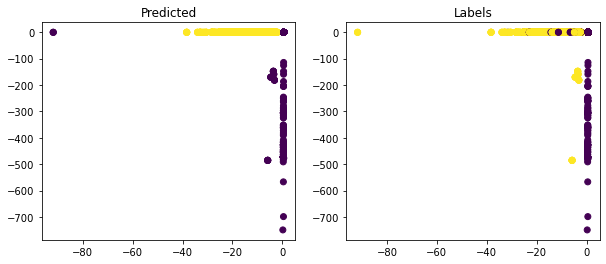

In [80]:
xs = np.array(features.collect()).squeeze()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(xs[:, 0], xs[:,1], c=predict)
axes[0].set_title('Predicted')
axes[1].scatter(xs[:, 0], xs[:,1], c=labels)
axes[1].set_title('Labels')
pass

In [53]:

#from pyspark import SparkContext
#data=sc.parallelize(sonar)

In [33]:
data = sonar.rdd.map(lambda x: LabeledPoint(x[2], x[0]))

In [34]:

train, test = sonar.randomSplit([0.7, 0.3])

In [35]:
train.take(1)


[Row(std_features=DenseVector([-0.2067, -0.1939, -0.2208, -0.0397, -0.0055, -0.0052, -0.209, -0.2501, -0.0938, -0.1692, -0.1885, -0.0032, -0.0041, -0.0042, -0.0007]), lable='0', label_idx=0.0)]

In [ ]:
#model = LogisticRegressionWithLBFGS.train(train)

In [37]:
y_yhat = test.rdd.map(lambda x: (x.label, model.predict(x.features)))
err = y_yhat.filter(lambda x: x[0] != x[1]).count() / float(test.count())
print("Error = " + str(err))

Traceback (most recent call last):
  File "/home/wry/spark-3.0.1-bin-hadoop2.7/python/pyspark/serializers.py", line 468, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
  File "/home/wry/spark-3.0.1-bin-hadoop2.7/python/pyspark/cloudpickle.py", line 1097, in dumps
    cp.dump(obj)
  File "/home/wry/spark-3.0.1-bin-hadoop2.7/python/pyspark/cloudpickle.py", line 357, in dump
    return Pickler.dump(self, obj)
  File "/root/anaconda3/lib/python3.8/pickle.py", line 485, in dump
    self.save(obj)
  File "/root/anaconda3/lib/python3.8/pickle.py", line 558, in save
    f(self, obj)  # Call unbound method with explicit self
  File "/root/anaconda3/lib/python3.8/pickle.py", line 899, in save_tuple
    save(element)
  File "/root/anaconda3/lib/python3.8/pickle.py", line 558, in save
    f(self, obj)  # Call unbound method with explicit self
  File "/home/wry/spark-3.0.1-bin-hadoop2.7/python/pyspark/cloudpickle.py", line 501, in save_function
    self.save_function_tuple(obj)
  File 

PicklingError: Could not serialize object: TypeError: cannot pickle '_thread.RLock' object

In [44]:
from pyspark.mllib.classification import LogisticRegressionWithSGD